In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [9]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.59', '1.3.1')

In [0]:
torch.cuda.set_device(0)

In [0]:
class BengaliTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load("bn_spm.model")
        
    def tokenizer(self, t:str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

In [0]:
sp = spm.SentencePieceProcessor()
sp.Load("bn_spm.model")
itos = [sp.IdToPiece(int(i)) for i in range(50000)]

In [0]:
bengali_vocab = Vocab(itos)

In [0]:

tokenizer = Tokenizer(tok_func=BengaliTokenizer, lang='bn')

In [27]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

# Data Directory Format
- data
    - train
        - train_article1.txt
        - train_article2.txt
        ..............
        - train_articlen.txt
        
    - valid
        - val_article1.txt
        - val_article2.txt
        ..............
        - val_articlen.txt

In [28]:
data_lm = TextLMDataBunch.from_folder(path='data', tokenizer=tokenizer, vocab=bengali_vocab)

In [29]:
data_lm.batch_size

64

In [0]:

data_lm.save()

In [31]:
data_lm.show_batch()

idx,text
0,"▁আছে । ▁ডলারের ▁সঙ্গে ▁টাকার ▁বিনিময় ▁হার ▁প্রতিনিয়ত ▁বাড়ছে । ▁এটি ▁চলতে ▁থাকলে ▁আগামী ▁অর্থ বছর ▁থেকে ▁বাংলাদেশ ▁পেট্রোলিয়াম ▁করপোরেশন ▁( বি পিসি ) ▁আবার ▁লোকসান ের ▁সম্মুখীন ▁হতে ▁পারে । ▁বাস্তবতার ▁কারণে ▁আন্তর্জাতিক ▁বাজারে ▁তেলের ▁দাম ▁কম া - বাড় ার ▁সঙ্গে ▁সঙ্গে ▁দেশের ▁অভ্যন্তরে ▁জ্বালানি ▁তেলের ▁বাড়ানো - কম ানো ▁করা ▁সম্ভব ▁হয় ▁না । ▁তিনি ▁বলেন , ▁এর ▁আগে ▁ভর্তুকি ▁মূল্যে ▁জ্বালানি ▁তেল ▁বিক্রি ▁করায় ▁২৭ ,"
1,"▁পাওয়ায় ▁আরমান কেও ▁ছয় ▁মাসের ▁কারাদণ্ড ▁দেন ▁ভ্রাম্যমাণ ▁আদালত । ▁তদন্তে ▁খালেদ ের ▁সম্পদ ▁পাওয়া ▁গেছে ▁বেশি গত ▁১৮ ▁সেপ্টেম্বর ▁‘ ▁শুদ্ধ ি ▁অভিযান ’ ▁শুরুর ▁দিনই ▁গ্রেপ্তার ▁হন ▁মহানগর ▁যুবলীগ ের ▁সাবেক ▁সাংগঠনিক ▁সম্পাদক ▁খালেদ ▁মাহমুদ ▁ভূঁইয়া । ▁তাঁর ▁বিরুদ্ধে ই ▁অস্ত্র , ▁মাদক ▁ও ▁অর্থ ▁পাচার ▁আইনে ▁আলাদা ▁মামলা ▁করে ▁র ▁্যাব । ▁এর ▁৩৩ ▁দিন ▁পর ▁২১ ▁অক্টোবর ▁অবৈধ ▁সম্পদ ▁অর্জন ের ▁অভিযোগে ▁খালেদ ের ▁বিরুদ্ধে ▁মামলা"
2,▁ব্যাংকে ▁তাঁর ▁নামে ▁জমা ▁অর্থের ▁সন্ধান ▁পাওয়া ▁যায়নি । ▁তবে ▁প্রায় ▁সাড়ে ▁১৪ ▁কোটি ▁টাকার ▁স্থাবর ▁সম্পদ ▁পেয়ে ▁আদালতের ▁মাধ্যমে ▁তা ▁ক্রো ক ▁করা ▁হয়েছে । ▁মমিনুল ▁হক ▁সাঈদ ঢাকা ▁দক্ষিণ ▁সিটি ▁করপোরেশন ের ▁( ডিএস সিসি ) ▁অপসারিত ▁কাউন্সিলর ▁এ ▁কে ▁এম ▁মমিনুল ▁হক ▁ওরফে ▁সাঈদ ের ▁বিরুদ্ধে ▁প্রায় ▁সাড়ে ▁পাঁচ ▁কোটি ▁টাকার ▁অবৈধ ▁সম্পদে ▁অর্জন ের ▁অভিযোগে ▁মামলা ▁করেন ▁দু দক ের ▁সহকারী ▁পরিচালক ▁আতাউর ▁রহমান ▁সরকার ।
3,"▁ডিভিশন ▁বেঞ্চ ▁বলেছেন , ▁ঐতিহাসিক ▁এই ▁সৌধ ে ▁পোকামাকড় ▁ও ▁কীট ের ▁আক্রমণ ▁শুরু ▁হলেও ▁তা ▁বন্ধের ▁জন্য ▁কোনো ▁পদক্ষেপ ▁নেওয়া ▁হচ্ছে ▁না । ▁ওই ▁দিন ▁সুপ্রিম ▁কোর্ট ▁প্রত্নতাত্ত্বিক ▁বিভাগ ▁এবং ▁ভারত ▁সরকারের ▁সংশ্লিষ্ট ▁মন্ত্রণালয় কে ▁এ ▁ব্যাপারে ▁তারা ▁কী ▁ভাব ছে ▁তা ▁জানতে ▁চেয়েছিলেন । ▁বিচারপতি ▁এম ▁বি ▁লোক ুর ▁ও ▁বিচারপতি ▁দীপক ▁গুপ্তের ▁ডিভিশন ▁বেঞ্চ ▁জানান , ▁যদি ▁প্রত্নতাত্ত্বিক ▁বিভাগ ▁রক্ষণাবেক্ষণ ের ▁জন্য ▁সঠিকভাবে ▁কাজ ▁করত ▁তা ▁হলে"
4,"▁প্রকাশের ▁পর ▁ভারতীয় ▁সংবাদমাধ্যম গুলো ▁ধোনি র ▁রান ▁আউট ▁নিয়ে ▁প্রশ্ন ▁তুলেছে । ▁ধোনি ▁ল কি ▁ফার্গুসন ের ▁যে ▁ডেলিভারি তে ▁রান ▁আউট ▁হলেন ▁সেটি ▁বৈধ ▁ছিল ▁কি ▁না ▁এবং ▁বৈধ ▁না ▁হলে ▁ফল টাও ▁পাল্টে ▁যেতে ▁পারত ▁বলে ▁মনে ▁করা ▁হচ্ছে । ▁ম্যাচের ▁সে ▁মুহূর্তে ▁( ৪৯ তম ▁ওভার ) ▁তৃতীয় ▁পাওয়ার ▁প্লে ▁চলছিল , ▁যখন ▁নিয়ম ▁অনুযায়ী ▁৩০ ▁গজ ের ▁বাইরে ▁পাঁচজন ▁ফিল্ডার ▁রাখতে ▁হয় । ▁কিন্তু ▁ফার্গুসন"


In [32]:
len(data_lm.vocab.itos)

50000

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [36]:
gc.collect()

0

In [37]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


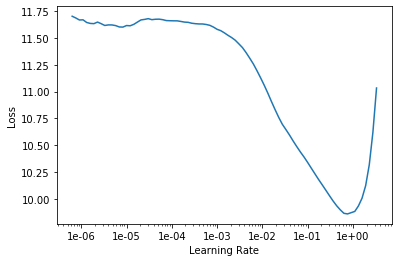

In [38]:
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.067542,4.010976,0.408964,20:56


In [0]:
learn.save('first', with_opt=True)

In [0]:
learn.load('first', with_opt=True);

In [0]:
learn.unfreeze()

In [43]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.944655,3.754163,0.428755,23:51
1,4.001336,3.643759,0.438392,23:51
2,3.609906,3.459911,0.453578,23:49
3,3.194248,3.255993,0.472943,23:49
4,3.174088,3.185421,0.480687,23:50


In [0]:

learn.save('second_bn_lm', with_opt=True)

In [45]:
learn.load('second_bn_lm', with_opt=True)

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (49000 items)
x: LMTextList
▁x x bo s ▁আপাতত ▁জ্বালানি ▁তেলের ▁দাম ▁কমানোর ▁কোনো ▁পরিকল্পনা ▁সরকারের ▁নেই । আজ ▁রোববার ▁জাতীয় ▁সংসদে ▁স্পিকার ▁শিরীন ▁শারমিন ▁চৌধুরীর ▁সভাপতিত্বে ▁অনুষ্ঠিত ▁অধিবেশনে ▁লিখিত ▁প্রশ্নের ▁উত্তরে ▁বিদ্যুৎ , ▁জ্বালানি ▁ও ▁খনিজ ▁সম্পদ ▁মন্ত্রণালয়ের ▁প্রতিমন্ত্রী ▁নস রুল ▁হামিদ ▁এ ▁কথা ▁জানিয়েছেন । সাংস দ ▁রুস্তম ▁আলী ▁ফর া জীর ▁প্রশ্নের ▁উত্তরে ▁প্রতিমন্ত্রী ▁বলেন , ▁আন্তর্জাতিক ▁বাজারে ▁জ্বালানি ▁তেলের ▁মূল্য ▁গত ▁এক ▁বছর ▁ধরে ▁ঊর্ধ্বমুখী ▁রয়েছে । ▁এখন ▁তা ▁অব্যাহত ▁আছে । ▁ডলারের ▁সঙ্গে ▁টাকার ▁বিনিময় ▁হার ▁প্রতিনিয়ত ▁বাড়ছে । ▁এটি ▁চলতে ▁থাকলে ▁আগামী ▁অর্থ বছর ▁থেকে ▁বাংলাদেশ ▁পেট্রোলিয়াম ▁করপোরেশন ▁( বি পিসি ) ▁আবার ▁লোকসান ের ▁সম্মুখীন ▁হতে ▁পারে । ▁বাস্তবতার ▁কারণে ▁আন্তর্জাতিক ▁বাজারে ▁তেলের ▁দাম ▁কম া - বাড় ার ▁সঙ্গে ▁সঙ্গে ▁দেশের ▁অভ্যন্তরে ▁জ্বালানি ▁তেলের ▁বাড়ানো - কম ানো ▁করা ▁সম্ভব ▁হয় ▁না । ▁তিনি ▁বলেন , ▁এর ▁আগে ▁ভর্তুকি ▁মূল্যে ▁জ্বালানি ▁তেল ▁বিক্রি ▁করায় ▁২৭ , ৪ ১৯ . ৮১ ▁কোটি ▁ট

In [1]:
# learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

In [0]:
# learn.save('third_bn_lm', with_opt=True)

In [0]:
# learn.load('third_bn_lm', with_opt=True)

In [0]:
TEXT = "আমি ভাত"
N_WORDS = 40
N_SENTENCES = 2

In [49]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.9) for _ in range(N_SENTENCES)))

আমি ভাত ▁খেতে ▁যেতে ▁না ▁থেকে ▁বাবাকে ▁চাল ▁খাওয়া ই । ▁মা ▁ও ▁সন্তানের ▁জন্য ▁এই ▁জন্য ▁বড় ▁হলো ▁মায়ের ▁কাছ ▁থেকেই । ▁বাবা ▁ছিলেন ▁স্নেহ প্রিয় । ▁আর ▁জীবনের ▁সবচেয়ে ▁বড় ▁মূল্য মাথা । ▁মায়ের ▁সংখ্যা ▁অনেক ▁বেশি । ▁তাই ▁মাকে
আমি ভাত ▁খেতে ▁চেয়ে ছি , ▁আবার ▁ভাত ▁খেয়ে ▁এ ▁নিয়ে ছি । ▁বড় ▁হলে ▁ভাত ও ▁তত ই ▁খাই । ▁কিন্তু ▁কিছুদিন ▁পর ▁খেতে ▁হবে ▁আরও ▁অনেক ▁কিছু । ▁আর ▁মহাসড়কের ▁পাশে ▁বা গ্ ▁বিত ণ্ডা ▁হলে ▁স্মৃতি কাতর তা ▁খুঁজে


In [50]:
np.exp(3.18)

24.046753552064498

In [0]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [0]:

defaults.device = torch.device('cpu')

In [53]:
learn = load_learner('data')

In [0]:
encoder = get_model(learn.model)[0]

In [55]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([50000, 400])

In [0]:
embeddings = encoder.state_dict()['encoder.weight']

In [0]:
embeddings = np.array(embeddings)

In [58]:
embeddings[0].shape

(400,)

In [0]:
df = pd.DataFrame(embeddings)

In [60]:
df.shape

(50000, 400)

In [0]:
df.to_csv('embeddings.tsv', sep='\t', index=False, header=False)

In [62]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,1.519147,-0.338538,-0.322993,0.496238,0.098371,0.075079,0.024507,0.406928,0.387621,0.364256,0.255530,-0.311458,0.103552,0.289388,-0.123796,0.172206,0.269486,-0.568885,-0.002781,0.072160,-0.512767,0.718229,-1.051017,-0.109541,0.420937,0.688201,-0.597122,0.030777,1.302488,-0.291035,-0.257079,0.102987,-0.246445,0.062267,0.354884,-1.579218,0.335564,0.570639,0.183605,-0.453165,...,0.226298,-0.534996,0.478331,0.360410,-0.291242,-0.093434,-0.007875,-0.011368,-1.273552,-0.195241,0.261901,0.309590,0.969685,0.197837,0.142561,-0.551167,0.224117,0.444174,-0.375852,-0.372211,0.701081,-0.099432,0.455516,-0.282334,0.263698,-0.319697,0.053192,1.361396,0.548867,0.281571,-0.675717,0.890020,-0.163127,-0.064471,0.355062,-0.092898,0.080171,1.056229,-0.254369,0.194149
1,0.215880,-0.281083,-0.076468,0.645870,0.108067,-0.054152,0.004968,0.271106,0.123613,0.306289,0.095745,-0.026538,-0.084179,-0.116340,-0.131077,0.152588,0.000538,-0.179786,0.005402,-0.091754,-0.098584,-0.001274,-0.256310,0.041168,-0.057125,0.144765,-0.057948,-0.010002,0.430544,0.257618,0.081338,0.099999,-0.001650,0.114830,0.047858,0.122234,0.225454,0.172662,0.253951,-0.149850,...,0.066561,-0.127290,0.270543,-0.007161,0.088882,0.149287,0.228523,-0.013212,-0.040180,0.102019,0.126551,0.064211,0.044406,0.025446,0.244191,0.009434,0.096366,0.132957,-0.008290,0.006329,0.152019,-0.036090,0.018737,0.037381,0.061726,0.020832,0.045020,0.253873,0.108226,0.065113,-0.078641,-0.166052,-0.034477,0.040449,-0.004826,-0.085019,0.118476,0.040263,-0.088529,0.126536
2,0.215880,-0.281083,-0.076468,0.645870,0.108067,-0.054152,0.004968,0.271106,0.123613,0.306289,0.095745,-0.026538,-0.084179,-0.116340,-0.131077,0.152588,0.000538,-0.179786,0.005402,-0.091754,-0.098584,-0.001274,-0.256310,0.041168,-0.057125,0.144765,-0.057948,-0.010002,0.430544,0.257618,0.081338,0.099999,-0.001650,0.114830,0.047858,0.122234,0.225454,0.172662,0.253951,-0.149850,...,0.066561,-0.127290,0.270543,-0.007161,0.088882,0.149287,0.228523,-0.013212,-0.040180,0.102019,0.126551,0.064211,0.044406,0.025446,0.244191,0.009434,0.096366,0.132957,-0.008290,0.006329,0.152019,-0.036090,0.018737,0.037381,0.061726,0.020832,0.045020,0.253873,0.108226,0.065113,-0.078641,-0.166052,-0.034477,0.040449,-0.004826,-0.085019,0.118476,0.040263,-0.088529,0.126536
3,0.898026,-0.690510,-0.239638,1.076966,0.185235,-0.370822,0.106030,0.157349,0.149632,0.047356,0.556123,-0.469701,-0.024103,-0.007439,0.197466,0.499086,0.151432,-0.071895,-0.072724,-0.060304,-0.192259,0.247862,-0.724344,-0.030063,-0.009125,2.240739,0.241452,0.121467,0.880413,0.635299,0.113039,0.451559,-1.015792,1.271875,0.423796,0.645522,0.865535,0.362611,0.238215,-0.695747,...,0.118646,-0.094060,0.085948,0.460326,-0.060748,0.160269,0.035154,-0.056113,-0.477324,-0.075465,0.410035,0.765674,-0.010620,-0.547232,0.292419,-0.691181,0.335171,0.078930,0.031296,0.023022,1.269140,-0.117736,0.130820,0.239819,1.353570,-0.482412,-0.012015,1.030337,-0.904898,-0.639286,-0.381472,0.104657,0.065797,0.075736,0.393004,-1.078355,0.222484,0.079325,-1.242540,0.241402
4,1.527203,-0.524044,0.225554,1.106350,0.100403,-0.275454,0.099973,0.355689,-0.056807,-0.027576,0.196937,-0.482750,-0.068912,-0.061794,0.034289,0.180437,-0.084979,-0.617483,0.498759,-0.296683,-0.573743,0.023758,-0.708261,0.100459,0.300181,2.871728,1.584947,0.401176,0.832169,0.428417,0.123132,0.410840,-0.807719,1.434388,0.216449,-0.083485,0.730427,0.473414,0.232616,-0.320222,...,0.129234,-0.094193,0.053623,0.707653,-0.145279,0.169620,0.194685,-0.024818,-0.546910,-0.108973,0.212305,0.671836,0.531251,-0.614999,0.027614,0.226309,0.405950,0.245482,0.107315,-0.173087,0.777069,-0.331699,-0.088441,0.037202,0.933685,-0.059242,0.044453,1.065674,-0.836825,-0.290807,-0.143679,-0.158636,-0.058296,-0.040

In [0]:
df2 = pd.DataFrame(itos)

In [64]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,।
4,","


In [65]:
df2.shape

(50000, 1)

In [0]:
df2.to_csv('embeddings_metadata.tsv', sep='\t', index=False, header=False)

In [67]:
encoder.state_dict()['encoder.weight'][1]

tensor([ 2.1588e-01, -2.8108e-01, -7.6468e-02,  6.4587e-01,  1.0807e-01,
        -5.4152e-02,  4.9676e-03,  2.7111e-01,  1.2361e-01,  3.0629e-01,
         9.5745e-02, -2.6538e-02, -8.4179e-02, -1.1634e-01, -1.3108e-01,
         1.5259e-01,  5.3810e-04, -1.7979e-01,  5.4016e-03, -9.1754e-02,
        -9.8584e-02, -1.2739e-03, -2.5631e-01,  4.1168e-02, -5.7125e-02,
         1.4477e-01, -5.7948e-02, -1.0002e-02,  4.3054e-01,  2.5762e-01,
         8.1338e-02,  9.9999e-02, -1.6498e-03,  1.1483e-01,  4.7858e-02,
         1.2223e-01,  2.2545e-01,  1.7266e-01,  2.5395e-01, -1.4985e-01,
         4.1301e-02, -2.7622e-01,  1.8389e-01,  3.1426e-02, -2.9815e-02,
        -4.2218e-01, -1.0806e-01, -2.1413e-01, -1.9013e-02, -1.2826e-02,
        -2.3501e-01,  4.3627e-02,  3.6595e-02,  2.2734e-01,  1.0812e-01,
        -2.7880e-02, -1.2361e-01, -1.1470e-02, -1.7682e-02, -1.8844e-01,
        -7.4338e-02, -4.8292e-01,  1.7460e-02,  3.3784e-02,  9.4717e-03,
         2.2932e-02,  7.0432e-02, -1.0725e-01,  1.0